# Data Exploration

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
df = pd.read_csv('DataAnalyst.csv')
cli_usa = pd.read_csv("advisorsmith_cost_of_living_index.csv")

In [185]:
# drop the first column
def data_cleaning(df):
    df.drop(df.columns[0], axis=1, inplace=True)
    df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split('(')[0])
    df.fillna("Not Available", inplace=True)
    df["Company Name"] = df["Company Name"].apply(lambda x: x.split('\n')[0])
    df["Size"] = df["Size"].apply(lambda x: x.split('employees')[0])
    df["Size"] = df["Size"].apply(lambda x: x.replace(" to ", "-"))
    df["Type of ownership"] = df["Type of ownership"].apply(lambda x: "Unknown" if x == "-1" else x)
    return df

df = data_cleaning(df)

In [186]:
cli_usa[cli_usa["City"] == "New York"]

,City,State,Cost of Living Index
305,New York,NY,128.0


In [187]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201-500,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001-5000,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201-500,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501-1000,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [188]:
def get_state(x):
    # if there are more than 1 commas in the string, then the state is the 2nd last element
    if x.count(',') > 1:
        return x.split(', ')[2]
    else:
        return x.split(', ')[1]
    
df['State'] = df['Location'].apply(get_state)
df['City'] = df['Location'].apply(lambda x: x.split(',')[0])


In [189]:
# merge with cost of living index by city and state
df = df.merge(cli_usa, how='left', left_on=['City', 'State'], right_on=['City', 'State'])
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,State,City,Cost of Living Index
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201-500,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,NY,New York,128.0
1,Quality Data Analyst,$37K-$66K,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,NY,New York,128.0
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001-5000,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,NY,New York,128.0
3,Data Analyst,$37K-$66K,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201-500,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,NY,New York,128.0
4,Reporting Data Analyst,$37K-$66K,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501-1000,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,NY,New York,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K,Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.","Denver, CO","Alpharetta, GA",51-200,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1,CO,Denver,112.1
2249,Senior Data Analyst (Corporate Audit),$78K-$104K,Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics,"Centennial, CO","Centennial, CO",10000+,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1,CO,Centennial,NaN
2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K,"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,Unknown,-1,-1,-1,-1,-1,CO,Denver,112.1
2251,"Data Analyst 3, Customer Experience",$78K-$104K,Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services,"Centennial, CO","West Chester, OH",201-500,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1,CO,Centennial,NaN


In [190]:
def get_salary_range(x):
    if x == '-1':
        return -1
    range_salary = x.split('-')
    n1 = range_salary[0].replace('$', '').replace('K', '').replace(' ', '')
    n2 = range_salary[1].replace('$', '').replace('K', '').replace(' ', '')
    
    # create array of numbers between n1 and n2
    range_salary = np.arange(int(n1), int(n2)+1, 1)
    # get median
    range_salary = np.median(range_salary)
    return range_salary

# add a new column with the median salary
df['Salary'] = df['Salary Estimate'].apply(get_salary_range)

In [191]:
df["Salary"].value_counts()

Salary
 59.5    88
 72.0    81
 68.0    68
 63.0    58
 59.0    57
         ..
 45.0     4
 44.0     4
 60.0     3
 64.0     3
-1.0      1
Name: count, Length: 74, dtype: int64

In [192]:
# def delete_subsets(salary_ranges):
#     new_ranges = []
#     salary_ranges = sorted(salary_ranges, key=lambda x: x[0])
#     salary_ranges = sorted(salary_ranges, key=lambda x: x[-1])
#     if salary_ranges[0][0] == -1 and salary_ranges[0][1] == -1:
#         salary_ranges.pop(0)
#     i = 1
#     while i < len(salary_ranges):
#         if salary_ranges[i][0] >= salary_ranges[i-1][0] and salary_ranges[i][-1] <= salary_ranges[i-1][-1]:
            
#         else:
#             i += 1
#     return salary_ranges

# salary_ranges = delete_subsets(initial_salary_ranges)

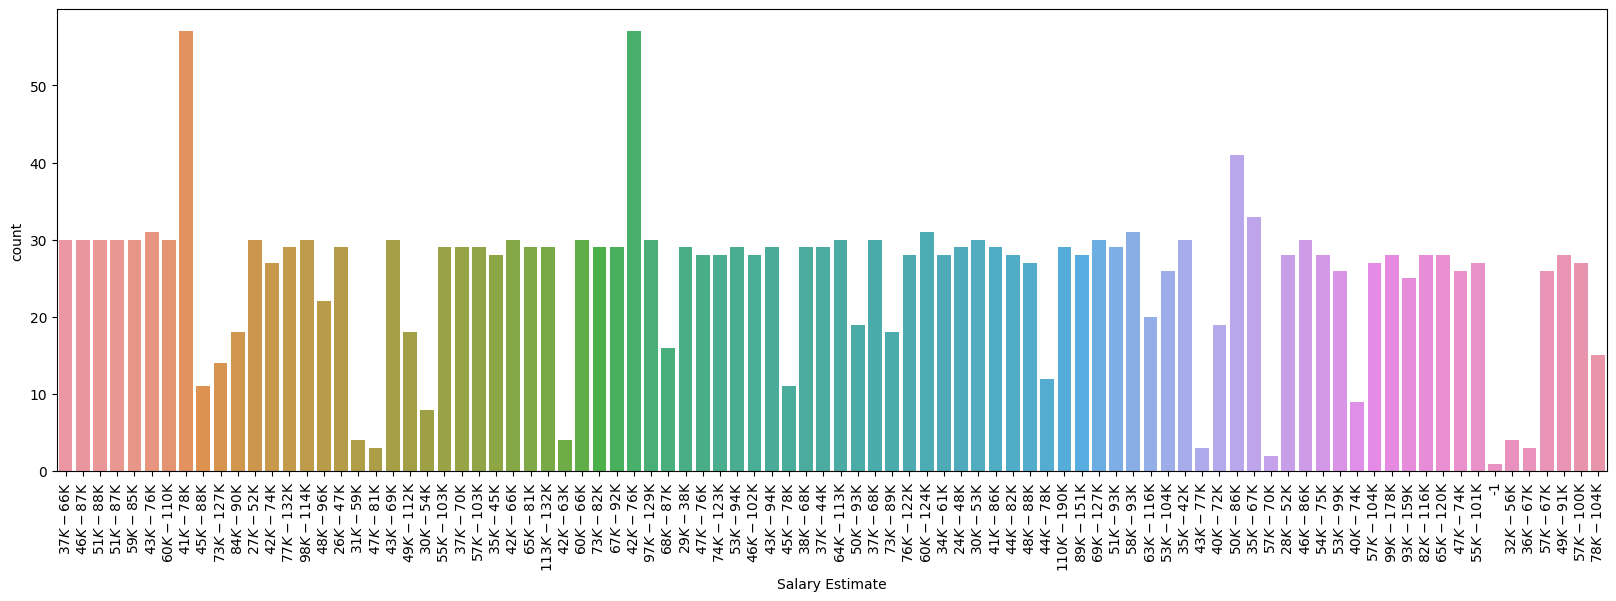

In [193]:
def plot_count(df, col):
    plt.figure(figsize=(20, 6))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=90)
    plt.show()

plot_count(df, "Salary Estimate")

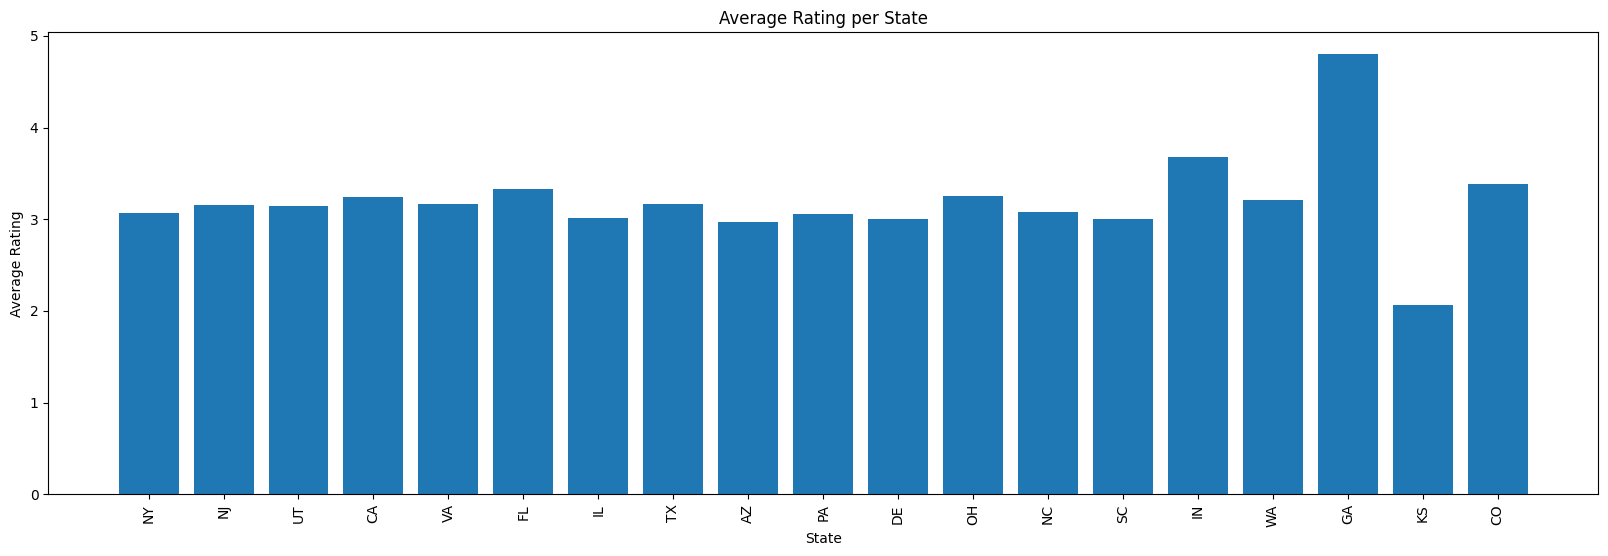

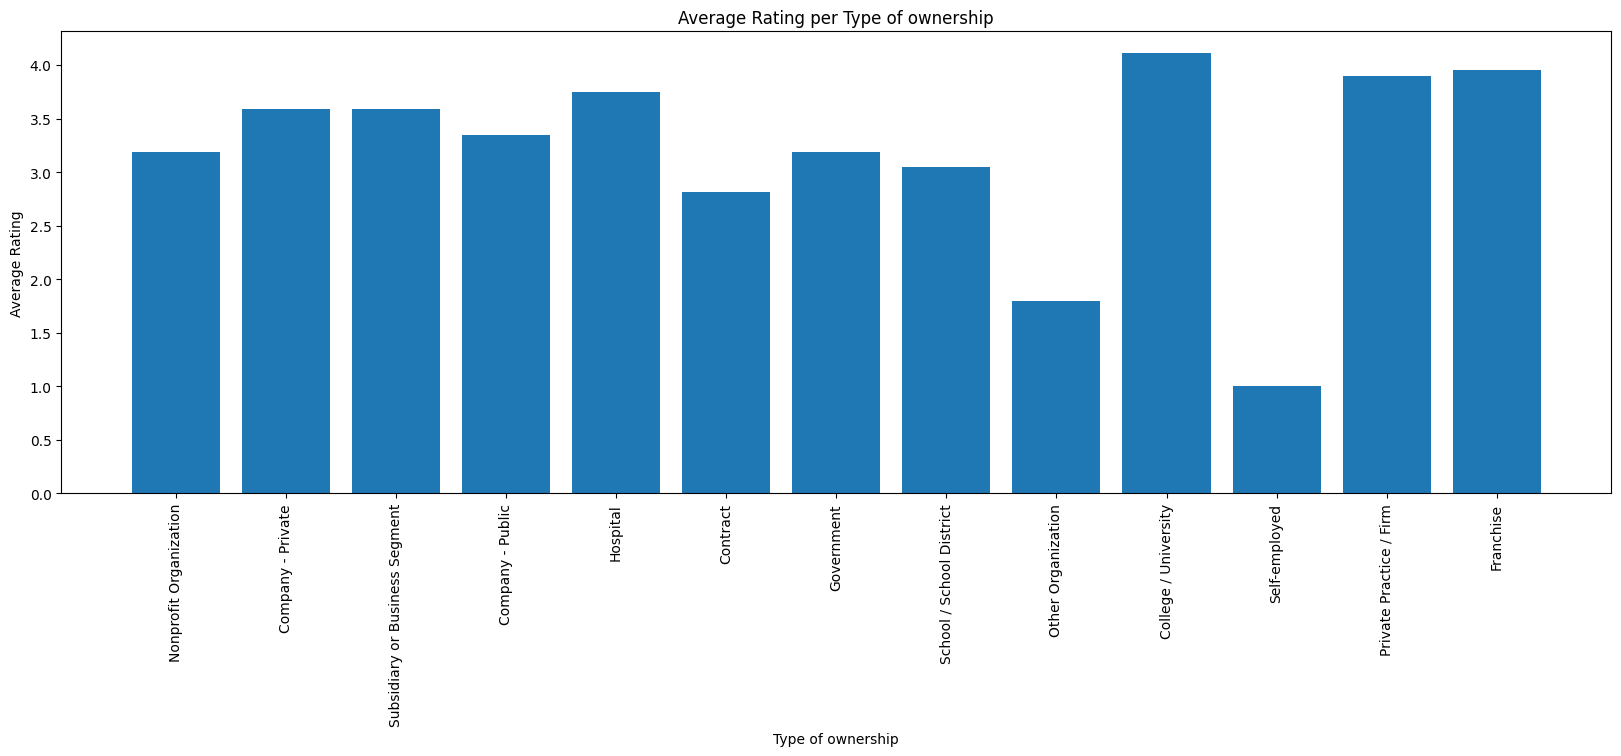

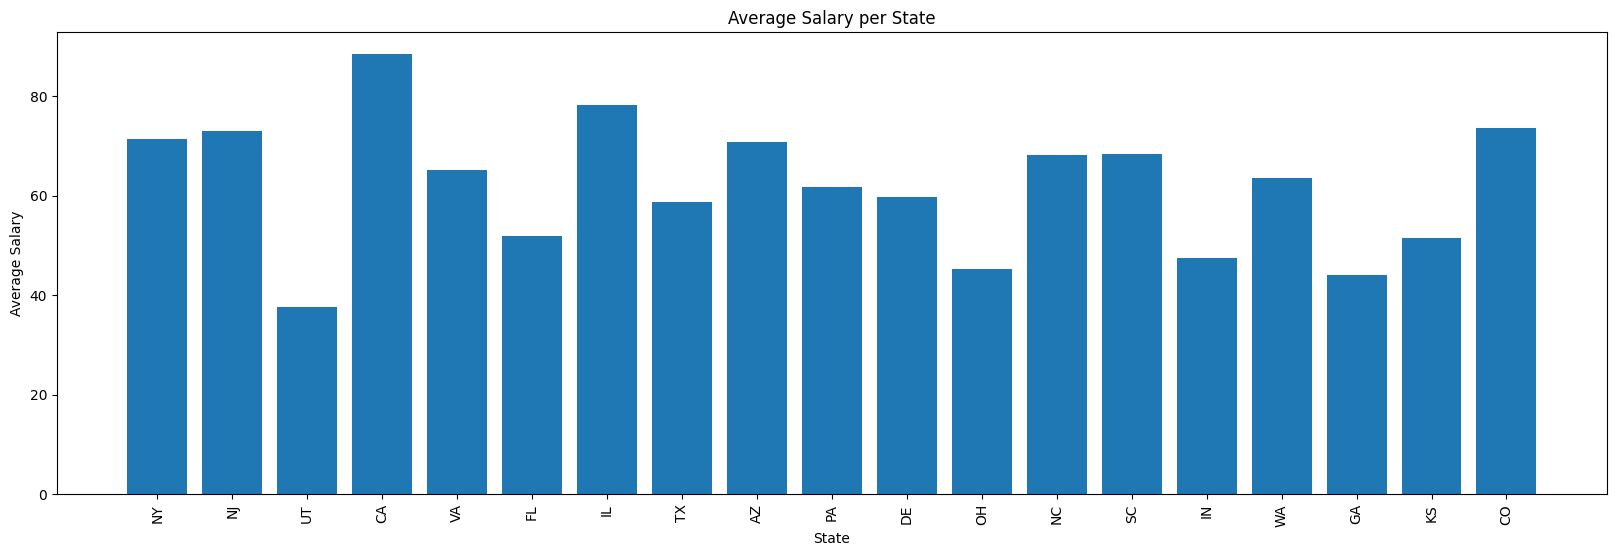

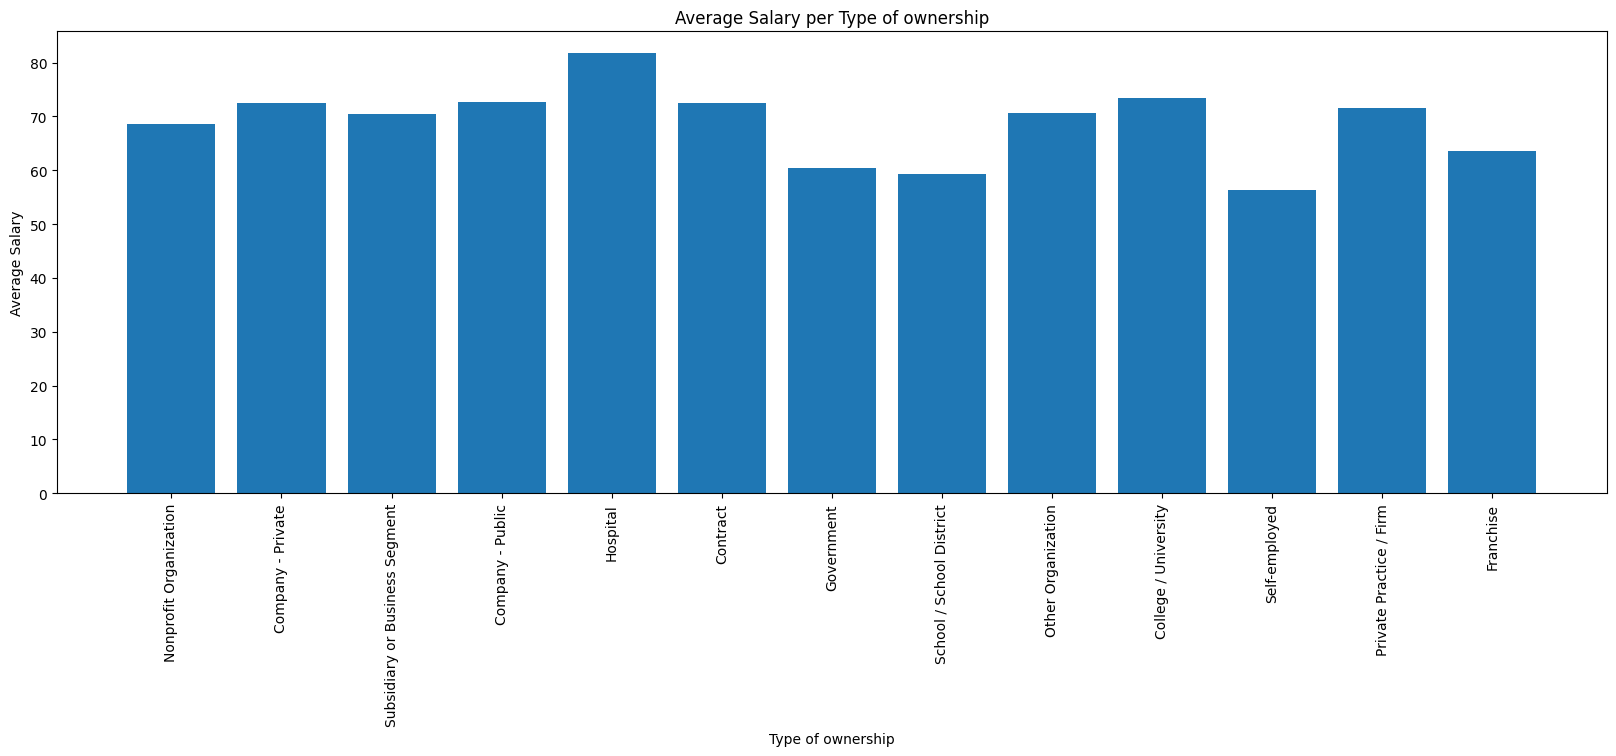

In [194]:
# get the average rating for each state
def get_avg_rating(df, col, col2):
    avg_rating = {}
    for i in df[col].unique():
        if i != "Not Available" and i != "Unknown":
            avg_rating[i] = df[df[col] == i][col2].mean()

    plt.figure(figsize=(20, 6))
    plt.bar(avg_rating.keys(), avg_rating.values())
    plt.title("Average " + col2 + " per " + col + "")
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel("Average " + col2)
    plt.show()
    return avg_rating

avg_rating_per_state = get_avg_rating(df, "State", "Rating")
avg_rating_ownership = get_avg_rating(df, "Type of ownership", "Rating")

# get the average salary for each state
avg_salary_per_state = get_avg_rating(df, "State", "Salary")
avg_salary_per_ownership = get_avg_rating(df, "Type of ownership", "Salary")